In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv("E:\data analyze tools\911.csv")
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [4]:
df['desc'].nunique()

663282

the top 5 zip codes 

In [5]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

the top 5 common titles 

In [6]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
Name: title, dtype: int64

new column "reason" from title

In [7]:
df['reason'] = df['title'].apply(lambda title : title.split(':')[0])
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire


drop title column 

In [8]:
df.drop(columns='title', inplace=True)
df.head()

,lat,lng,desc,zip,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [9]:
#the reasons of 911 calls in dataset
df['reason'].value_counts().head()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

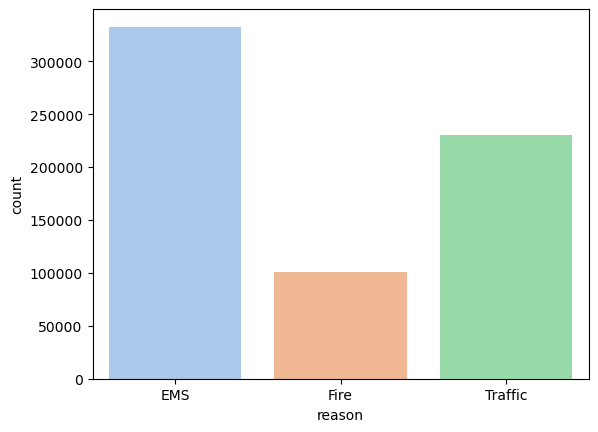

In [46]:
#count plot for reason values
sns.countplot(x='reason', data=df, palette='pastel');

In [11]:
#the top 5 twp in dataset
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [12]:
#convert timestamp column into datetime format
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df['timeStamp'].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

In [13]:
#extracting days, months, years and hour of 911 calls
time=df['timeStamp'].iloc[0]
df['day']=df['timeStamp'].apply(lambda time:time.dayofweek)
df['month']=df['timeStamp'].apply(lambda time:time.month)
df['year']=df['timeStamp'].apply(lambda time:time.year)
df['hour']=df['timeStamp'].apply(lambda time:time.hour)
df.head()

,lat,lng,desc,zip,timeStamp,twp,addr,e,reason,day,month,year,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,3,12,2015,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,3,12,2015,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,3,12,2015,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,3,12,2015,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,3,12,2015,16


In [14]:
#mapping days num into abbr
day_map={0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}
df['day']=df['day'].map(day_map)
df['day']

0         thu
1         thu
2         thu
3         thu
4         thu
         ... 
663517    wed
663518    wed
663519    wed
663520    wed
663521    wed
Name: day, Length: 663522, dtype: object

In [49]:
bymonth=df.groupby('month').count()
bymonth

,lat,lng,desc,zip,timeStamp,twp,addr,e,reason,day,year,hour,date
month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62312,62336,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55405,55427,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60001,60027,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53655,53671,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57474,57509,57509,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60005,60034,60034,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59802,59832,59832,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48335,48359,48359,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47196,47213,47213,47213,47213,47213,47213,47213


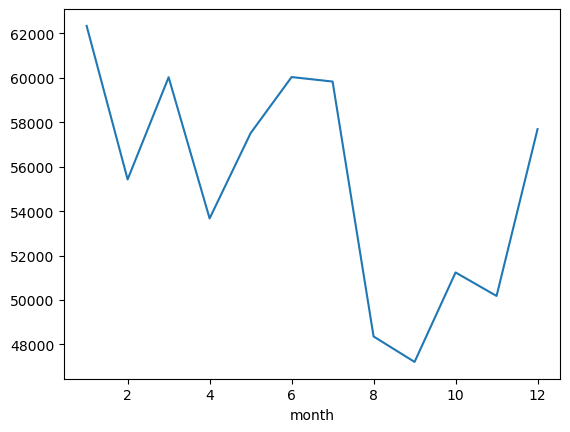

In [54]:
bymonth.plot(kind='line', y='e', legend=False);

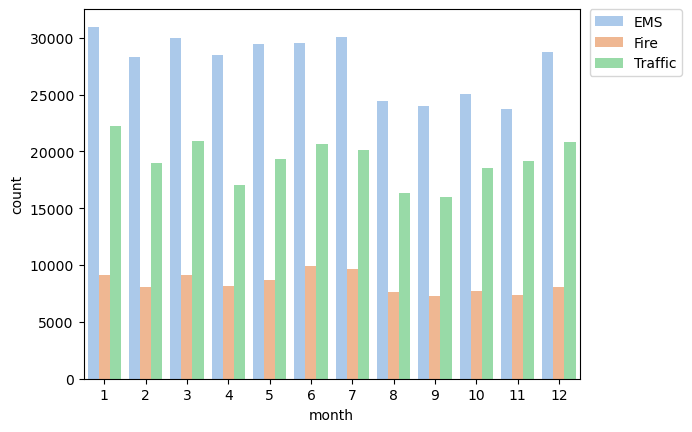

In [44]:
##countplot calls reasons per month
sns.countplot(x='month', data=df, hue='reason', palette='pastel')
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0);

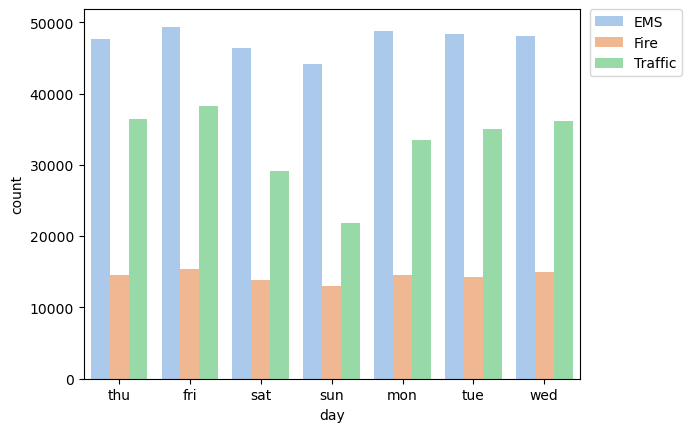

In [45]:
#countplot calls reasons per day 
sns.countplot(x='day', data=df, hue='reason', palette='pastel')
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0);

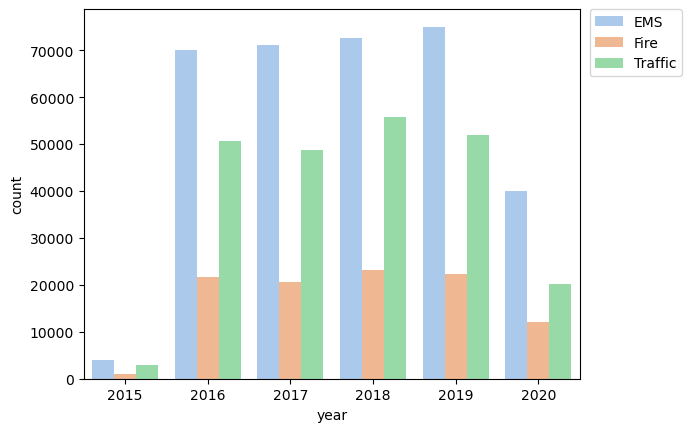

In [43]:
#countplot calls reasons per year
sns.countplot(x='year', data=df, hue='reason', palette='pastel')
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0);

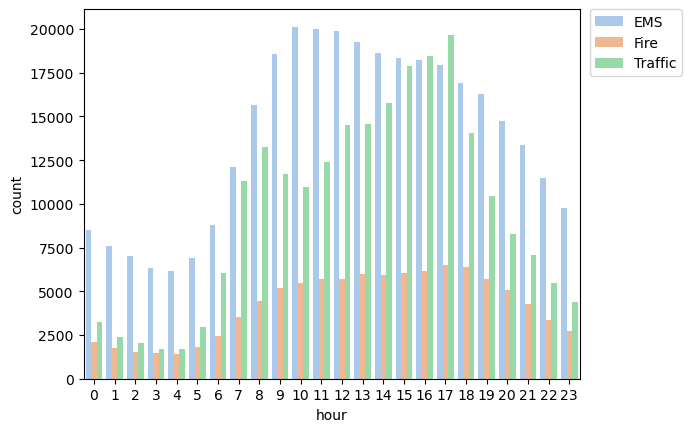

In [42]:
#countplot calls reasons per hour of the day
sns.countplot(x='hour', data=df, hue='reason', palette='pastel')
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0);

In [19]:
#number of calls per day
dt=df['timeStamp'].iloc[0]
df['date']=df['timeStamp'].apply(lambda dt:dt.date())
df.groupby('date').count()['desc'].head()

date
2015-12-10    114
2015-12-11    391
2015-12-12    402
2015-12-13    316
2015-12-14    444
Name: desc, dtype: int64

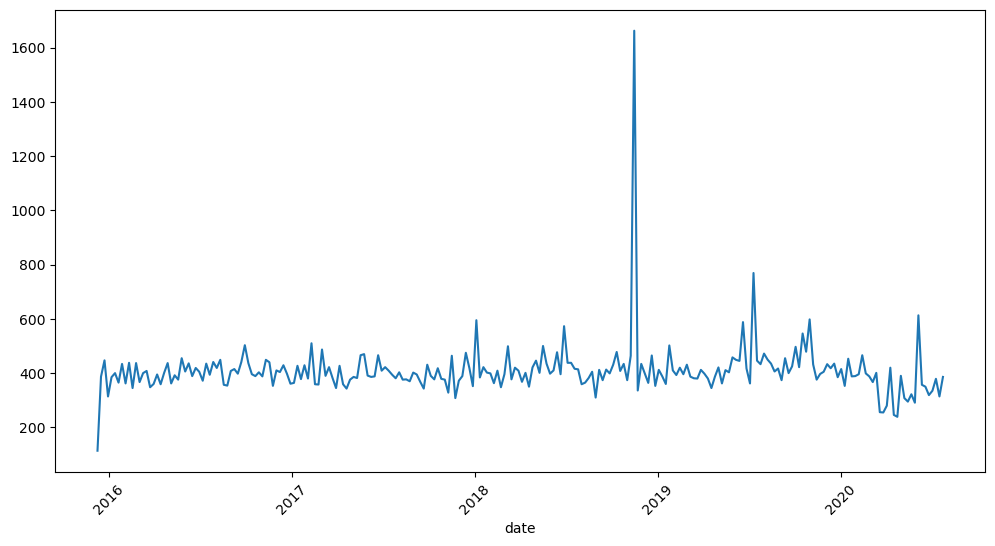

In [41]:
#plot number of calls per day
df.groupby('date').count()['desc'][::7].plot(figsize=(12,6), rot=45);

In [28]:
#matrix of 911 calls by month and day
month_day=df.groupby(by=['month','day']).count()['reason'].unstack(level=[0])
month_day

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


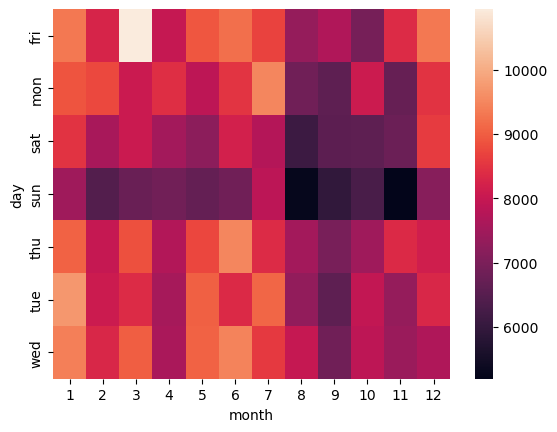

<Figure size 2000x1500 with 0 Axes>

In [72]:
sns.heatmap(month_day);
plt.figure(figsize=(20,15));

In [29]:
#matrix of 911 calls by year and day
year_day=df.groupby(by=['year','day']).count()['reason'].unstack(level=[0])
year_day


year,2015,2016,2017,2018,2019,2020
day,,,,,,
fri,1058,21991,21421,24505,22907,11060
mon,1251,20542,20299,22147,21988,10518
sat,960,19488,18849,20437,19759,9959
sun,904,17068,16818,17670,17639,8760
thu,1262,20924,20598,22726,22403,10770
tue,1234,21207,21303,21654,22164,10122
wed,1247,21140,21055,22388,22258,11069


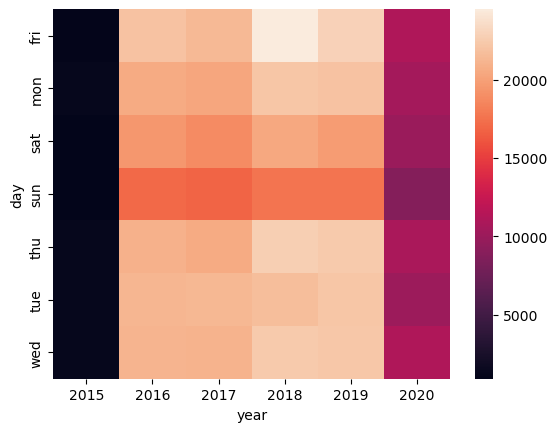

<Figure size 2000x1500 with 0 Axes>

In [47]:
sns.heatmap(year_day)
plt.figure(figsize=(20,15))

In [62]:
# reset the index column
bymonth.reset_index(inplace=True)


ValueError: cannot insert level_0, already exists

In [65]:
bymonth=bymonth.drop('level_0', axis=1)

In [67]:
bymonth=bymonth.drop('index', axis=1)

In [68]:
bymonth

,month,lat,lng,desc,zip,timeStamp,twp,addr,e,reason,day,year,hour,date
0,1,62336,62336,62336,55294,62336,62312,62336,62336,62336,62336,62336,62336,62336
1,2,55427,55427,55427,48922,55427,55405,55427,55427,55427,55427,55427,55427,55427
2,3,60027,60027,60027,53252,60027,60001,60027,60027,60027,60027,60027,60027,60027
3,4,53671,53671,53671,47349,53671,53655,53671,53671,53671,53671,53671,53671,53671
4,5,57509,57509,57509,50354,57509,57474,57509,57509,57509,57509,57509,57509,57509
5,6,60034,60034,60034,52593,60034,60005,60034,60034,60034,60034,60034,60034,60034
6,7,59832,59832,59832,52507,59832,59802,59832,59832,59832,59832,59832,59832,59832
7,8,48359,48359,48359,42311,48359,48335,48359,48359,48359,48359,48359,48359,48359
8,9,47213,47213,47213,41289,47213,47196,47213,47213,47213,47213,47213,47213,47213
9,10,51240,51240,51240,44582,51240,51220,51240,51240,51240,51240,51240,51240,51240


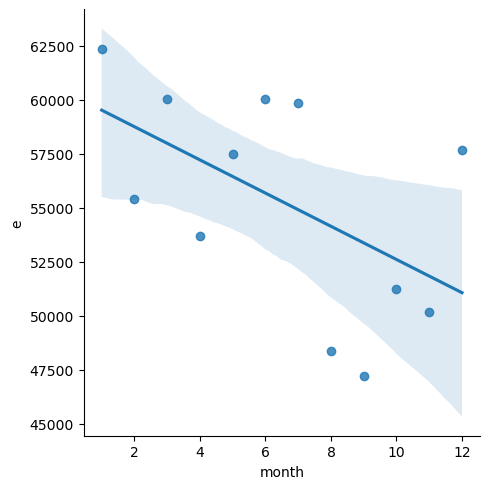

In [71]:
#linear fit on munber of 911 calls per month
sns.lmplot(bymonth, x='month', y='e');